In [1]:
%matplotlib inline
import thesis
chapter = 'cmb'
save = True

In [2]:
#    L    TT             TE             EE             BB             PP
ell_theory, tt_theory = np.loadtxt('COM_PowerSpect_CMB-base-plikHM-TT-lowTEB-minimum-theory_R2.02.txt',
                                   usecols=(0, 1), unpack=True)

#     ELL          D_ELL            ERR
#       I              E              E
#               muKcmb^2       muKcmb^2
ell_high, tt_high, tt_high_error = np.loadtxt('COM_PowerSpect_CMB-TT-hiL-full_R2.02.txt',
                                              skiprows=3, unpack=True)

#     ELL          D_ELL          ERRUP        ERRDOWN
#       I              E              E              E
#    none       muKcmb^2       muKcmb^2       muKcmb^2
ell_low, tt_low, dtt_low_up, dtt_low_down = np.loadtxt('COM_PowerSpect_CMB-TT-loL-full_R2.02.txt',
                                                       skiprows=3, unpack=True)

# Combine low and high ell
ell = np.concatenate((ell_low, ell_high))
tt = np.concatenate((tt_low, tt_high))

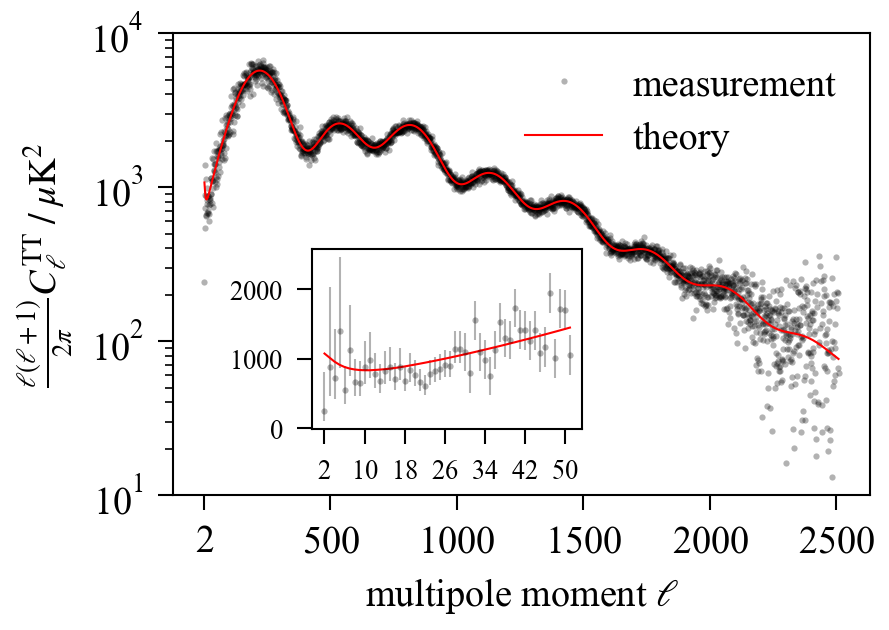

In [3]:
fig, ax = plt.subplots()
inset = plt.axes([0.28, 0.22, 0.3, 0.3])
ax.set_xlabel("multipole moment $\ell$")
ax.set_ylabel(r"$\frac{\ell (\ell + 1)}{2 \pi} C_{\ell}^\mathrm{TT} \; / \; \mu \mathrm{K}^2$",
              fontsize='small', rotation='vertical') #, labelpad=30)
ax.set_yscale('log')
measurement_dict = dict(marker='.', color='black', linestyle='none', alpha=0.3, label='measurement')
theory_dict = dict(color='red', alpha=1, label='theory')
ax.plot(ell, tt, **measurement_dict)
#ax.errorbar(ell, tt, yerr=tt_error, marker='.', color='black', linestyle='none', alpha=0.2, label='measurement', zorder=0)
ax.plot(ell_theory, tt_theory, **theory_dict)
ax.legend(loc='upper right')
ax.set_ylim(1e1, 1e4)
ax.set_xticks([2, 500, 1000, 1500, 2000, 2500])

inset_ell_max = 51
indices = ell_high <= inset_ell_max
inset.errorbar(ell_low, tt_low, yerr=(dtt_low_down, dtt_low_up),
               **measurement_dict)
inset.errorbar(ell_high[indices], tt_high[indices], yerr=tt_high_error[indices],
               **measurement_dict)
inset.plot(ell_theory[ell_theory <= inset_ell_max], tt_theory[ell_theory <= inset_ell_max],
           **theory_dict)
inset.set_xticks(range(2, inset_ell_max, 8))
inset.set_yticks([0, 1000, 2000])
inset.tick_params(labelsize='xx-small')

if save:
    fig.savefig(thesis.full_filename(chapter, 'cmb_temperature_power_spectrum.pdf'))